# Анонимные функции

Помимо инструкции `def` в Python имеется возможность создавать объекты функций в форме выражений – `lambda`.
Подобно инструкции `def` это выражение создает функцию, которая будет вызываться позднее, но в отличие от `def`, выражение возвращает функцию, но не связывает ее с именем.


Поэтому lambda-выражение иногда называют анонимными (безымянными) функциями. На практике часто используются как способ получить встроенную функцию или отложить выполнение фрагмента кода.

lambda-выражение состоит из ключевого слова lambda, за которым следует один или более аргументов и далее, вслед за двоеточием, находится выражение:

`lambda arguments: expression`

В качестве результата `lambda`-выражения возвращают точно такие же объекты функций, которые создаются инструкциями `def`.

`lambda`-функция по поведению эквивалентна следующему

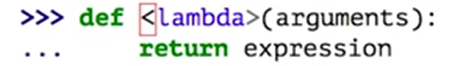

`lambda`-выражения удобны в нескольких случаях:
- `lambda` – это выражение, а не инструкция, поэтому ключевое слово lambda может появляться там, где def не может – внутри литералов или в вызовах функций
- `lambda`-выражение возвращает значение (новую функцию), которую при желании можно присвоить переменной, в противовес инструкции def, которая всегда связывает функцию с именем в заголовке, а не возвращает ее в виде результата.
- тело `lambda` – это не блок инструкций, а единственное выражение.


In [1]:
def f(x, y, z):
    return x + y + z

ff = lambda x, y, z: x + y + z
print(ff(1,2,3))

6


Лямбда-функцию можно возвращать как аргумент

In [5]:
def getfunc(x):
    if x > 0:
        return lambda z: z ** 0.5
    else:
        return lambda z: (z - x) ** 0.5

In [6]:
f1 = getfunc(9)
print(f1)
print(f1(3))

<function getfunc.<locals>.<lambda> at 0x000001B48A551DA0>
1.7320508075688772


In [8]:
f2 = getfunc(-6)
print(f2)
print(f2(3))

<function getfunc.<locals>.<lambda> at 0x000001B48A043240>
3.0


In [9]:
def func(x, y):
    if x > 0 and y > 0:
        return lambda z: x * z + y ** 0.5
    elif x > 0 and y < 0:
        return lambda z: x * z + abs(y)**0.5 + 1
    else:
        return lambda z: z + 10

f1 = func(2, 9) # f1(z) = 2*z+3
print(f1)
print(f1(1))
f2 = func(2, -9) # f2 = 2z+3+1
print(f2)
print(f2(1))
f3 = func(-2, -9) # f3 = z + 10
print(f3)
print(f3(1))

<function func.<locals>.<lambda> at 0x000001B48A551300>
5.0
<function func.<locals>.<lambda> at 0x000001B48A551120>
6.0
<function func.<locals>.<lambda> at 0x000001B48A043240>
11


Лямбда-функцию также  используют в циклах для генерации динамических функций, например, для элементов интерфейса. 

Когда все элементы должны выполнять одно и то же действие, но с разными аргументами, и этим аргументом является, например, номер итерации, в которой был создан этот элемент.

# Функция filter

Сначала напишем пример:

In [11]:
a = [5, 12, 7, 0, 4, 10, 3, -2]
res = []
for x in a:
    if x % 2 == 0:
        res.append(x)
print(res)

[12, 0, 4, 10, -2]


Вынесем проверку числа на четность в отдельную функцию

In [2]:
def is_even(x):
    return x % 2 == 0

a = [5, 12, 7, 0, 4, 10, 3, -2]
res = []

for x in a:
    if is_even(x):
        res.append(x)
print(res)
print(sum(res))

[12, 0, 4, 10, -2]
24


Программа по-прежнему возвращает список четных чисел.

И этот весь код можно записать в функциональном стиле, используя функцию filter.

In [3]:
a = [5, 12, 7, 0, 4, 10, 3, -2]

res = list(filter(is_even, a))
print(res)

for x in res:
    print(x)
print(sum(res))

[12, 0, 4, 10, -2]
12
0
4
10
-2
24


Обратите внимание, что название функции передаем без параметров, так как требуется только имя функции.

Первым аргументом функция `filter` принимает другую функцию – функцию-критерий для фильтрации элементов из последовательности, которую мы передаем вторым аргументом.
Эта функция-критерий должна возвращать `True` или `False`, т.е. сообщать, пропускаем мы элемент дальше или нет.


Запишем функцию, которая возвращает True, если число меньше 8 и False в противном случае:

In [34]:
def f8(x):
    return x < 8

Применим ее к нашему списку:

In [39]:
a = [5, 12, 7, 0, 4, 10, 3, -2]
print(a)
a3 = list(filter(f8, a))
print(a3)

[5, 12, 7, 0, 4, 10, 3, -2]
[5, 7, 0, 4, 3, -2]


Далее  выведем все четные числа меньшие 8:

In [40]:
a = [5, 12, 7, 0, 4, 10, 3, -2]
print(a)
a3 = list(filter(f8,filter(is_even, a)))
print(a3)

[5, 12, 7, 0, 4, 10, 3, -2]
[0, 4, -2]


Сначала вызывается внутреняя функция `filter`, которая возвращает только четные элементы. 

Далее эти четные элементы помещаются во внешнюю функцию `filter` и уже к ним применяется `f8` и в конце `list` преобразовывает результат в список, чтобы мы могли его вывести на экран.

Если нужно отфильтровать данные еще по какому-то критерию, то можем ввести еще одну функцию `filter`.

Несмотря на то, что код, написанный в функциональном стиле читать сложнее, у него все же есть преимущества. 

`filter` работает намного быстрее, нежели структурный подход, поэтому при больших объемах фильтруемых данных стоит присмотреться к `filter`.


Написанная выше функция `is_even` применяется только в одном месте, поэтому теряет свой смысл. 

Можно использовать `lambda-функцию`:

In [43]:
a = [5, 12, 7, 0, 4, 10, 3, -2]
a4 = list(filter(lambda x: x % 2==0, a))
print(a4)

[12, 0, 4, 10, -2]


In [42]:
a = [5, 12, 7, 0, 4, 10, 3, -2]
a4 = list(filter(lambda x: x < 8, filter(lambda x: x % 2==0, a)))
print(a4)

[0, 4, -2]


# Функция map

Функции, которые могут принимать другие функции в качестве аргументов, также называются функциями высшего порядка. 

In [ ]:
def calculate(a, b, operation):
    result = operation(a, b)
    return result

def summ(a, b):
    return a + b

def multiply(a, b):
    return a * b

x = calculate(2, 3, summ) 
y = calculate(3, 4, multiply) 
print(x, y)

5 12


Яркий пример функции высшего порядка - функция map(), которая принимает аргументом функцию и итерируемую последовательность, и применяет функцию-параметр к каждому элементу последовательности.

In [82]:
a = ['1','2','12']
b = list(map(int, a))
print(b)

[1, 2, 12]


In [47]:
a = [1, 2, 3]
b = list(map(str, a))
print(b)

['1', '2', '3']


In [48]:
def func(x):
    return x ** 2

a = [1, 2, 3]
b = list(map(func, a))
print(b)

[1, 4, 9]


Можем помещать `map` друг в друга или даже совмещать с `filter`. 

In [ ]:
def func(x):
    return x ** 2

a = ['1', '2', '3', '0', '-1', '-8']
b = [int(x) ** 2 for x in a]
b = list(map(func, map(int, a)))
print(b)

[1, 4, 9, 0, 1, 64]


In [53]:
c = list(filter(is_even, map(int,a)))
print(c)

[2, 0, -8]


Использование lambda-функции в map

In [54]:
a = [5, 12, 7, 0, 4, 10, 3, -2]
print(a)
b1 = list(map(lambda x: x % 2, a))
print(b1)

[5, 12, 7, 0, 4, 10, 3, -2]
[1, 0, 1, 0, 0, 0, 1, 0]


In [ ]:
s = ['  ghjgjhg  ', '     hhhh', 'dgdgf  ']
b2 = list(map(lambda x: x.strip(), s))
print(b2)

['ghjgjhg', 'hhhh', 'dgdgf']


In [56]:
c = list(map(lambda x, n: x ** n, [2,1,3], range(1,5)))
print(c)

[2, 1, 27]


In [58]:
a = [3, 9, 10, 1, 4, 5]
g=list(map(lambda x: x**2, filter(lambda y:y%2!=0,a)))
print(g)

[9, 81, 1, 25]


In [59]:
a = [3, 9, 10]
h = list(map(lambda x :(x, x**2),a))
print(h)

[(3, 9), (9, 81), (10, 100)]


## Функция zip

Строит последовательность кортежей из элементов нескольких последовательностей.

Рассмотрим программу, в которой содержатся два списка.

Задача – получить третий список, составленный из кортежей, составленных из элементов этих списков с одинаковыми индексами.

In [61]:
a = [3, 9, 10]
b = [5, 1, 6, 4]
print(zip(a,b))
print(list(zip(a,b)))

[(3, 5), (9, 1), (10, 6)]


In [62]:
print(list(map(lambda t: t[0]*t[1], zip(a,b))))

[15, 9, 60]


In [63]:
a1 = list(range(1, 10))
a2 = list(range(5, 15))
a3 = list(range(-10, 0))
print(a1)
print(a2)
print(a3)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [64]:
print(*map(lambda t: t[0]*t[1]*t[2], zip(a1, a2, a3)))

-50 -108 -168 -224 -270 -300 -308 -288 -234


Перебор пар элементов списка:

In [65]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
b = list(zip(a, a[1:]))
print(b)

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]


In [66]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
for x in zip(a, a[1:], a[2:]):
    print(x)

(1, 2, 3)
(2, 3, 4)
(3, 4, 5)
(4, 5, 6)
(5, 6, 7)
(6, 7, 8)


In [67]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
for x,y,z in zip(a, a[1:], a[2:]):
    if x + y + z > 7:
        print(x, y, z, x + y + z)

2 3 4 9
3 4 5 12
4 5 6 15
5 6 7 18
6 7 8 21


## Задача
Даны координаты точек в пространстве. 
Найти одну точку, которая будет являться центром для этих точек, т.е. среднее арифметическое.

In [ ]:
pos = [ [12.3, 32.1, 43.0],
        [87.5, 49.3, 34.4],
        [34.5, 98.3, 10.1],
        [65.5, 33.3, 11.0]]
coords = zip(*pos)
print(list(coords))

[(12.3, 87.5, 34.5, 65.5), (32.1, 49.3, 98.3, 33.3), (43.0, 34.4, 10.1, 11.0)]


In [ ]:
res1 = [sum(x)/len(x) for x in zip(*pos)]
print(res1)

[49.95, 53.25, 24.625]


In [ ]:
res2 = map(lambda x: sum(x)/len(x), zip(*pos))
print(res2)

## Функция reduce

**reduce** служит для организации цепочных вычислений. 
В python 2 reduce находилась в основной библиотеке, в python 3 эта функция перенесена в модуль functools.


In [ ]:
from functools import reduce

Вычислим с помощью reduce n!

In [112]:
n = int(input())
a = range(1,n+1)

In [113]:
def multiply(x, y):
    return x * y

In [114]:
fact = reduce(multiply, a)
print(fact)

120


 1 2 3 4 5 -> 2 3 4 5 -> 6 4 5 -> 24 5 -> 120

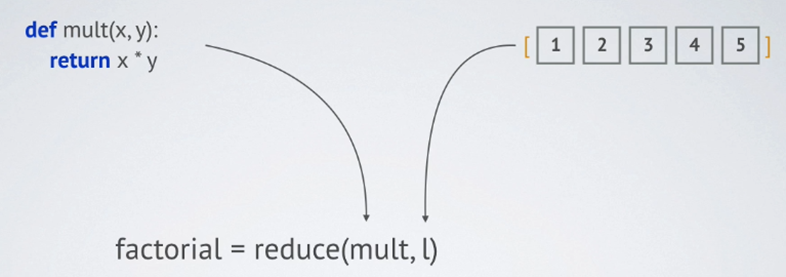

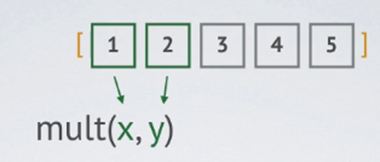

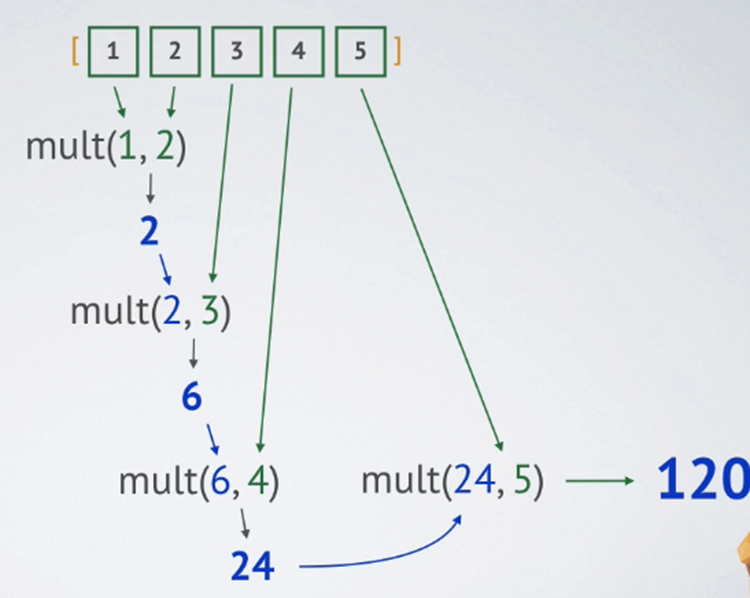

#### Вычислим максимум с помощью reduce

In [115]:
def mn(x, y):
    if x > y:
        return x
    return y

In [116]:
a = [56, 89, 100, 0, -3, 10, -2]
print(reduce(mn, a))

100


In [117]:
a = [56, 89, 100, 0, -3, 10, -2]
print(reduce(min, a))

-3


In [118]:
print(reduce(lambda x, y: x if x > y else y, a))

100


Вычисление суммы всех элементов списка при помощи reduce:

In [119]:
a = [1, 3, 10, 4, 7]
print(reduce(lambda x,y: x + y, a))

25


In [120]:
print(reduce(lambda x,y: x + y, a, 100))

125
